In [ ]:
#2021년 12월 월간 top100 데이터 크롤링 후 선호 장르 조사

In [1]:
import sys
import os

import pandas as pd
import numpy as np 


from selenium import webdriver  
from selenium.webdriver import ActionChains as AC
from bs4 import BeautifulSoup
import chromedriver_autoinstaller
from tqdm import tqdm
from tqdm import tqdm_notebook
import re
from time import sleep
import time

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 크롬 웹 브라우저 실행
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)
#사이트 주소는 멜론
driver.get("https://www.melon.com/")
time.sleep(2)

In [59]:
#멜론차트 클릭
driver.find_element_by_css_selector(".menu_bg.menu01").click( )
time.sleep(1)

In [60]:
#월간차트 클릭
driver.find_element_by_css_selector(".menu_chart.m4").click( )

In [61]:
# 곡정보 더보기 버튼 클릭
more_info = driver.find_elements_by_css_selector(".btn.button_icons.type03.song_info")
more_info[0].click()
time.sleep(1)

In [62]:
# 제목 가져오기
overlays1=".song_name"
titles = driver.find_elements_by_css_selector(overlays1)
titles[0].text

'회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)'

In [63]:
# 가수 가져오기
overlays2=".artist_name"
artist = driver.find_element_by_css_selector(overlays2)
artist.text

'sokodomo'

In [64]:
# 앨범 정보
overlays3=".list"
album_info = driver.find_element_by_css_selector(overlays3).text.split('\n')
album_info

['앨범',
 '쇼미더머니 10 Episode 2',
 '발매일',
 '2021.11.13',
 '장르',
 '랩/힙합',
 'FLAC',
 'Flac 16/24bit']

In [65]:
# 앨범이름 
overlays3= ".list"
album_info = driver.find_element_by_css_selector(overlays3).text.split('\n')
album = album_info[1]
album

'쇼미더머니 10 Episode 2'

In [66]:
#장르
overlays3 = ".list"
album_info = driver.find_element_by_css_selector(overlays3).text.split('\n')
Genre = album_info[5]
Genre

'랩/힙합'

In [67]:
# 좋아요 수
overlays4="d_like_count"
like = driver.find_element_by_id(overlays4)
like.text

'174,637'

In [68]:
# 뒤로가기
driver.back()

In [30]:
# 2021년 12월 차트

In [3]:
#멜론차트 클릭
driver.find_element_by_css_selector(".menu_bg.menu01").click( )
time.sleep(1)

#월간차트 클릭
driver.find_element_by_css_selector(".menu_chart.m4").click( )

dict={}

n=100

for i in tqdm_notebook(range(0,n)):
    
    #곡 정보 더보기
    more_info = driver.find_elements_by_css_selector(".btn.button_icons.type03.song_info")
    more_info[i].click()
    time.sleep(1)
    
    try:
        target_info={}
        
        # 제목 
        overlays=".song_name"
        titles = driver.find_element_by_css_selector(overlays)
        title=titles.text
        
        #가수
        overlays2=".artist_name"
        artists = driver.find_element_by_css_selector(overlays2)
        artist=artists.text
        
        
        # 앨범 정보
        overlays3=".list"
        album= driver.find_element_by_css_selector(overlays3).text.split('\n')
        album_info=album
        
        time.sleep(1)
        
        # 앨범이름 
        overlays3= ".list"
        album_info= driver.find_element_by_css_selector(overlays3).text.split('\n')
        album_name = album_info[1]
        
        #장르
        overlays3 = ".list"
        album_info= driver.find_element_by_css_selector(overlays3).text.split('\n')
        Genre = album_info[5]
        
        # 좋아요 수
        overlays4="d_like_count"
        likes = driver.find_element_by_id(overlays4)
        like=likes.text
        
        target_info['title'] = title
        target_info['artist'] = artist
        target_info['album_name'] = album_name
        target_info['Genre'] = Genre
        target_info['like'] = like
        time.sleep(1)
        
        #dict에 담기
        dict[i] = target_info
        
        #크롤링 성공하면 글 제목 출력
        print(i, title)
        
        #글 하나 크롤링 후 뒤로가기
        driver.back()
      
    #에러처리
    except:
        driver.back()
        time.sleep(1)
        continue
        
        # 중간,중간에 파일로 저장하기
    if i == 30 or i==50 or i==80:
        # 판다스로 만들기
        import pandas as pd
        df = pd.DataFrame.from_dict(dict, 'index')

        # 저장하기
        df.to_csv("melon_2021_12_chart.csv", encoding='utf-8-sig')
        time.sleep(3)

print('수집한 글 갯수: ', len(dict))
dict

  0%|          | 0/100 [00:00<?, ?it/s]

0 회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
1 리무진 (Feat. MINO) (Prod. GRAY)
2 만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
3 불협화음 (Feat. AKMU) (Prod. GRAY)
4 Counting Stars (Feat. Beenzino)
5 strawberry moon
6 ELEVEN
7 쉬어 (Feat. MINO) (Prod. GRAY)
8 사랑은 늘 도망가
9 다정히 내 이름을 부르면
10 Wake Up (Prod. 코드 쿤스트)
11 신호등
12 All I Want for Christmas Is You
13 Savage
14 STAY
15 Santa Tell Me
16 눈이 오잖아(Feat.헤이즈)
17 네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY)
18 Next Level
19 MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY)
20 너를 생각해
21 OHAYO MY NIGHT
22 매일 크리스마스 (Everyday Christmas)
23 낙하 (with 아이유)
24 문득
25 바라만 본다
26 Butter
27 My Universe
28 Snowman
29 Permission to Dance
30 미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ)
31 호우주의 (Feat. 개코, 넉살 (Nucksal)) (Prod. 코드 쿤스트)
32 헤픈 우연
33 Weekend
34 Dynamite
35 깐부 (Feat. 염따, ASH ISLAND) (Prod. TOIL)
36 Celebrity
37 Peaches (Feat. Daniel Caesar & Giveon)
38 Bad Habits
39 Last Christmas
40 크리스마스니까
41 밤하늘의 별을(2020)
42 라일락
43 고백
44 그게 더 편할 것 같아 (N번째 연애 X 멜로망스)
45 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
46 찰나가 영원

{0: {'title': '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)',
  'artist': 'sokodomo',
  'album_name': '쇼미더머니 10 Episode 2',
  'Genre': '랩/힙합',
  'like': '175,093'},
 1: {'title': '리무진 (Feat. MINO) (Prod. GRAY)',
  'artist': "BE'O (비오)",
  'album_name': '쇼미더머니 10 Episode 3',
  'Genre': '랩/힙합',
  'like': '153,472'},
 2: {'title': '만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)',
  'artist': '베이식 (Basick)',
  'album_name': '쇼미더머니 10 Episode 3',
  'Genre': '랩/힙합',
  'like': '99,407'},
 3: {'title': '불협화음 (Feat. AKMU) (Prod. GRAY)',
  'artist': 'Mudd the student',
  'album_name': '쇼미더머니 10 Semi Final',
  'Genre': '랩/힙합',
  'like': '68,537'},
 4: {'title': 'Counting Stars (Feat. Beenzino)',
  'artist': "BE'O (비오)",
  'album_name': 'Counting Stars',
  'Genre': '랩/힙합',
  'like': '137,990'},
 5: {'title': 'strawberry moon',
  'artist': '아이유',
  'album_name': 'strawberry moon',
  'Genre': '록/메탈',
  'like': '174,809'},
 6: {'title': 'ELEVEN',
  'artist': 'IVE (아이브)',
  'album_name': 'ELEVEN',
  'Genre'

In [45]:
#데이터프레임 만들기
df = pd.DataFrame.from_dict(dict, 'index')
df.head()

,title,artist,album_name,Genre,like
0,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,쇼미더머니 10 Episode 2,랩/힙합,"175,093"
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),쇼미더머니 10 Episode 3,랩/힙합,"153,472"
2,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick),쇼미더머니 10 Episode 3,랩/힙합,"99,407"
3,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student,쇼미더머니 10 Semi Final,랩/힙합,"68,537"
4,Counting Stars (Feat. Beenzino),BE'O (비오),Counting Stars,랩/힙합,"137,990"


In [11]:
df['Genre']=df['New_Genre']

In [12]:
df

,title,artist,album_name,Genre,like,New_Genre
0,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,쇼미더머니 10 Episode 2,랩/힙합,"175,093",랩/힙합
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),쇼미더머니 10 Episode 3,랩/힙합,"153,472",랩/힙합
2,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick),쇼미더머니 10 Episode 3,랩/힙합,"99,407",랩/힙합
3,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student,쇼미더머니 10 Semi Final,랩/힙합,"68,537",랩/힙합
4,Counting Stars (Feat. Beenzino),BE'O (비오),Counting Stars,랩/힙합,"137,990",랩/힙합
...,...,...,...,...,...,...
95,"UP해 (Feat. 박재범, 우원재) (Prod. 코드 쿤스트)",SINCE,쇼미더머니 10 Final,랩/힙합,"14,875",랩/힙합
96,잠이 오질 않네요,장범준,잠이 오질 않네요,발라드,"153,710",발라드
97,오래된 노래,스탠딩 에그,오래된 노래,"인디음악, 포크/블루스","241,001","인디음악, 포크/블루스"
98,밤새 서로 미루다,존박,밤새 서로 미루다,발라드,"15,851",발라드


In [13]:
#'발라드, 국내드라마','발라드,인디음악' 값을 '발라드'로 변경
df.loc[(df.New_Genre=='발라드, 인디음악'),'New_Genre']='발라드'

In [14]:
#'발라드, 국내드라마','록/메탈, 국내드라마' 값을 'OST'로 변경
df.loc[(df.New_Genre=='발라드, 국내드라마'),'New_Genre']='OST'
df.loc[(df.New_Genre=='록/메탈, 국내드라마'),'New_Genre']='OST'

In [15]:
#R&B/Soul, 인디음악' 값을 'R&B/Soul'으로 변경
df.loc[(df.New_Genre=='R&B/Soul, 인디음악'),'New_Genre']='R&B/Soul'

In [17]:
df[0:50]

,title,artist,album_name,Genre,like,New_Genre
0,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,쇼미더머니 10 Episode 2,랩/힙합,"175,093",랩/힙합
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),쇼미더머니 10 Episode 3,랩/힙합,"153,472",랩/힙합
2,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick),쇼미더머니 10 Episode 3,랩/힙합,"99,407",랩/힙합
3,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student,쇼미더머니 10 Semi Final,랩/힙합,"68,537",랩/힙합
4,Counting Stars (Feat. Beenzino),BE'O (비오),Counting Stars,랩/힙합,"137,990",랩/힙합
5,strawberry moon,아이유,strawberry moon,록/메탈,"174,809",록/메탈
6,ELEVEN,IVE (아이브),ELEVEN,댄스,"87,906",댄스
7,쉬어 (Feat. MINO) (Prod. GRAY),아넌딜라이트(Anandelight),쇼미더머니 10 Episode 1,랩/힙합,"92,461",랩/힙합
8,사랑은 늘 도망가,임영웅,신사와 아가씨 OST Part.2,"발라드, 국내드라마","107,793",OST
9,다정히 내 이름을 부르면,경서예지,다정히 내 이름을 부르면 (경서예지 x 전건호),발라드,"101,939",발라드


In [18]:
df[50:100]

,title,artist,album_name,Genre,like,New_Genre
50,시간을 거슬러 (낮에 뜨는 달 X 케이윌),케이윌,시간을 거슬러 (낮에 뜨는 달 X 케이윌),발라드,"61,884",발라드
51,롤린 (Rollin'),브레이브걸스,Rollin',댄스,"290,269",댄스
52,밝게 빛나는 별이 되어 비춰줄게,송이한,밝게 빛나는 별이 되어 비춰줄게,R&B/Soul,"109,089",R&B/Soul
53,추억은 만남보다 이별에 남아,정동하,추억은 만남보다 이별에 남아,발라드,"74,934",발라드
54,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴,'키스 먼저 할까요?' OST Part.3,"발라드, 국내드라마","383,978",OST
55,내 손을 잡아,아이유,최고의 사랑 OST Part.4,"발라드, 국내드라마","178,527",OST
56,좋아좋아,조정석,슬기로운 의사생활 시즌2 OST Part 5,"발라드, 국내드라마","82,227",OST
57,비가 오는 날엔 (2021),헤이즈 (Heize),비가 오는 날엔 (2021),"발라드, 국내드라마","61,963",OST
58,DUMB DUMB,전소미,DUMB DUMB,댄스,"85,389",댄스
59,Dun Dun Dance,오마이걸 (OH MY GIRL),Dear OHMYGIRL,댄스,"150,231",댄스


In [20]:
#저장하기
df.to_csv("melon_2021_12_Chart_final.csv")

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
pwd

'/Users/oseunghui/Desktop'

In [23]:
#csv 불러오기
genre_2021_12 = pd.read_csv("melon_2021_12_Chart_final.csv")

In [24]:
genre_2021_12['New_Genre'].value_counts()

랩/힙합            25
발라드             21
댄스              19
POP              9
OST              7
R&B/Soul         6
성인가요             6
록/메탈             5
인디음악, 포크/블루스     1
일렉트로니카           1
Name: New_Genre, dtype: int64

In [46]:
# 튜플 형태로 라벨 지정
labels = '랩/힙합', '발라드','댄스','POP','OST','R&B/Soul','성인가요','록/메탈','일렉트로니카','인디음악, 포크/블루스'
labels

('랩/힙합',
 '발라드',
 '댄스',
 'POP',
 'OST',
 'R&B/Soul',
 '성인가요',
 '록/메탈',
 '일렉트로니카',
 '인디음악, 포크/블루스')

In [47]:
genre_2021_12.columns

Index(['title', 'artist', 'album_name', 'Genre', 'like', 'New_Genre'], dtype='object')

In [27]:
#'Unnamed:0' 칼럼 제거
genre_2021_12.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [48]:
genre_2021_12

,title,artist,album_name,Genre,like,New_Genre
0,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,쇼미더머니 10 Episode 2,랩/힙합,"175,093",랩/힙합
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),쇼미더머니 10 Episode 3,랩/힙합,"153,472",랩/힙합
2,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick),쇼미더머니 10 Episode 3,랩/힙합,"99,407",랩/힙합
3,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student,쇼미더머니 10 Semi Final,랩/힙합,"68,537",랩/힙합
4,Counting Stars (Feat. Beenzino),BE'O (비오),Counting Stars,랩/힙합,"137,990",랩/힙합
...,...,...,...,...,...,...
95,"UP해 (Feat. 박재범, 우원재) (Prod. 코드 쿤스트)",SINCE,쇼미더머니 10 Final,랩/힙합,"14,875",랩/힙합
96,잠이 오질 않네요,장범준,잠이 오질 않네요,발라드,"153,710",발라드
97,오래된 노래,스탠딩 에그,오래된 노래,"인디음악, 포크/블루스","241,001","인디음악, 포크/블루스"
98,밤새 서로 미루다,존박,밤새 서로 미루다,발라드,"15,851",발라드


In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='AppleGothic')

In [50]:
# 색(colors) 정하기, 차트 입체적으로(explode) 보이게
colors=['lightsteelblue','mistyrose','powderblue','bisque','thistle',\
        'lavender','lightgray','lightcyan','linen','pink']
explode=(0.05,0.05,0.05,0.05,0.07,0.08,0.1,0.1,0.1,0.1)

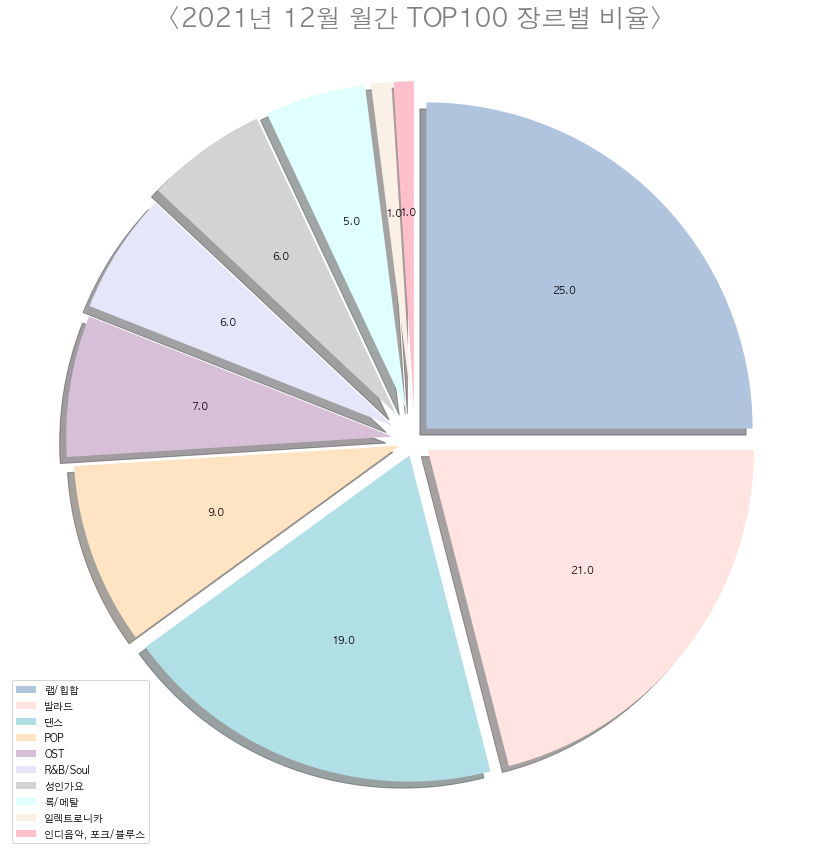

In [62]:
plt.figure(figsize=(15,15))

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 시계방향순서, 그림자, 값 소숫점 표시)
plt.pie(genre_2021_12['New_Genre'].value_counts(), explode=explode, labels=None, startangle=90,\
        counterclock=False, shadow=True, autopct='%.1f',colors=colors)

# 라벨, 타이틀 달기
plt.title('<2021년 12월 월간 TOP100 장르별 비율>', fontsize=25, color='gray')

# 레전드 달기
plt.legend(labels,loc='lower left')

plt.show()